# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')

#### 1. Is the distribution of body temperatures normal?

In [78]:
# Test graphically

In [79]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [80]:
len(df.index)

130

In [81]:
np.sqrt(130)

11.40175425099138

/Users/brysonsicotte/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


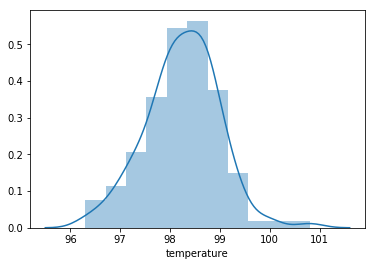

In [82]:
sns.distplot(df['temperature'], bins=11, norm_hist=True)

In [83]:
# create a CDF which is more accurate because there is no binning bias.
# look up the code in DataCamp.

In [84]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, len(data)+1) / n

    return x, y

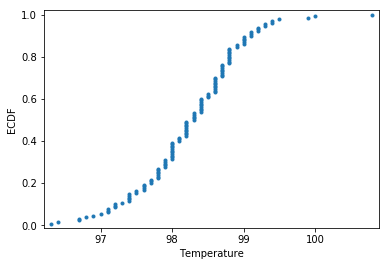

In [85]:
# Compute ECDF 
x, y = ecdf(df['temperature'])

# Generate plot
plt.plot(x, y, marker = '.', linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

From a graphical standpoint, this distribution appears to be close, but not quite normal.

In [86]:
# "Back of the envelope" test for normality

In [87]:
max_temp = df['temperature'].max()
max_temp

100.8

In [88]:
min_temp = df['temperature'].min()
min_temp

96.3

In [89]:
mean_temp = np.mean(df['temperature'])
mean_temp

98.24923076923078

In [90]:
std_temp = np.std(df['temperature'])
std_temp

0.7303577789050377

In [91]:
mean_temp + std_temp

98.97958854813581

In [92]:
max_temp_t_statisic = (max_temp - mean_temp)/std_temp
max_temp_t_statisic

3.4924927267747696

In [93]:
min_temp_t_statistic = (min_temp - mean_temp)/std_temp
min_temp_t_statistic

-2.6688711006174173

Because the maximum temperature is greater than 3s from the mean, and 
there are less than 300 samples, the sample cannot be described as normal.

#### 2. Is the sample size large? Are the observations independent?

The sample size (n=130) is sufficiently large enough for the central limit theorem to apply (n > 30).

The sample size (n=130) is <= 10% of the population (the total number of humans), which means we can safely say that the observations are independent.

#### 3. Is the true population mean really 98.6 degrees F?

In [94]:
# Bootstrap hypothesis test

In [95]:
def bs_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, size=len(data))
    return func(bs_sample)

In [96]:
# draw 10,000 

bs_replicates = np.empty(10000)

for i in range(10000):
    bs_replicates[i] = bs_replicate_1d(df['temperature'], np.mean)

In [97]:
np.mean(bs_replicates)

98.2493573846154

In [98]:
np.std(bs_replicates)

0.06434688861983345

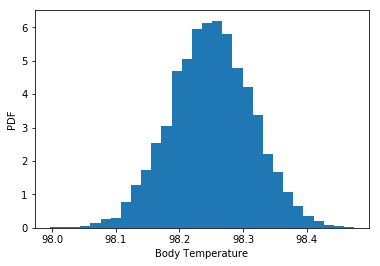

In [99]:
plt.hist(bs_replicates, bins=30, density=True)
plt.xlabel('Body Temperature')
plt.ylabel('PDF')
plt.show()

In [100]:
conf_int = np.percentile(bs_replicates, [0.5, 99.5])
conf_int

array([98.08230769, 98.41538462])

Based on this bootstrap test, we are confident at the 99% confidence level that the population mean is not 98.6 degrees.

#### Frequentist statistical testing

Would you use a one-sample or two-sample test? Why?

A one-sample test. The data we have are a single sample of temperature data, and the mean, assuming the null hypothesis is true, which is that the population mean is 98.6 degrees.

In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?

It is appropriate to use the z-statistic. Even though we don't have the population standard deviation, we can estimate the population standard deviation with our sample standard deviation as long as our sample size >= 30.

##### Step 1 - Define null and alternative hypotheses

Null: The true population mean = 98.6 degrees F

Alternative: The true population mean != 98.6 degrees F

##### Step 2 - State alpha

alpha = 0.05

##### Step 3 - State decision rule

Two-tailed test (98.6 could either be greater or less than the sample mean)

If Z is less than -1.96 or greater than 1.96, we will reject the null hypothesis.

##### Step 4 - Calculate Z-statistic

In [101]:
# z = (sample mean - population mean) / (sample std / sqrt of n)
z = (mean_temp - 98.6) / (std_temp / np.sqrt(130))
z

-5.475925202078116

Now try using the other test. 

##### Step 1 - Define null and alternative hypotheses

Null: The true population mean = 98.6 degrees F

Alternative: The true population mean != 98.6 degrees F

##### Step 2 - State alpha

alpha = 0.05

##### Step 3 -  Calculate the degrees of freedom

degrees of freedom = 129

##### Step 4 - State decision rule

2 tailed test (98.6 could either be greater or less than the sample mean)

If T is less than -1.984 or greater than 1.984, we will reject the null hypothesis.

##### Step 5 - Calculate t-statistic

In [102]:
# t = (sample mean - population mean) / (sample std / sqrt of n)

t = (mean_temp - 98.6) / (std_temp / np.sqrt(130))
t

-5.475925202078116

How is the result different? Why?

The Z-values and the T-values that make up the 95% confidence interval are different.

Z < -1.96 and Z > 1.96

T < -1.984 and T > 1.984

#### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [103]:
bs_sample_small = np.random.choice(df['temperature'], size=10)
bs_sample_small

array([ 98.5,  98.9, 100.8,  98. ,  96.8,  97.4,  98.4,  98.4,  97.9,
        98.4])

##### Step 1 - Define null and alternative hypotheses

Null: The true population mean = 98.6 degrees F

Alternative: The true population mean != 98.6 degrees F

##### Step 2 - State alpha

alpha = 0.05

##### Step 3 - State decision rule

Two-tailed test (98.6 could either be greater or less than the sample mean)

If Z is less than -1.96 or greater than 1.96, we will reject the null hypothesis.

##### Step 4 - Calculate Z-statistic

In [104]:
# z = (sample mean - population mean) / (sample std / sqrt of n)
z = (np.mean(bs_sample_small) - 98.6) / (np.std(bs_sample_small) / np.sqrt(10))
z

-0.7919565538216061

##### Step 1 - Define null and alternative hypotheses

Null: The true population mean = 98.6 degrees F

Alternative: The true population mean != 98.6 degrees F

##### Step 2 - State alpha

alpha = 0.05

##### Step 3 -  Calculate the degrees of freedom

degrees of freedom = 9

##### Step 4 - State decision rule

2 tailed test (98.6 could either be greater or less than the sample mean)

If T is less than -2.262 or greater than 2.262, we will reject the null hypothesis.

##### Step 5 - Calculate t-statistic

In [105]:
# t = (sample mean - population mean) / (sample std / sqrt of n)

t = (np.mean(bs_sample_small) - 98.6) / (np.std(bs_sample_small) / np.sqrt(10))
t

-0.7919565538216061

Which one is the correct one to use?

The t-statistic. When your sample size is less than 30, you should use the t-statistic, not the z-statistic, because your z-scores will not be normally distributed.

What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

The sample of 10 had a significantly different mean, causing the lower z-value and t-value, preventing us from rejecting the the null.  The z and t values that make up the confidence interval differ more as the sample size decreases.  The smaller the sample size, the more important it is to use the correct statistic (the t-statistic).

#### 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [106]:
# Bootstrap approach

In [107]:
alt_conf_int = np.percentile(bs_replicates, [2.5, 97.5])
alt_conf_int

array([98.12305769, 98.37615385])

Based on the bootstrap sampling distribution of the sample means, we are confident that a body temperature is abnormal at the 95% confidence level if the body temperature is less than 98.12538462 and greater than 98.37615385.

In [108]:
# Frequentist approach

Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

##### Calculate the margin of error

In [109]:
# margin of error = critical value * std or standard error

critical_value = 1.96
standard_error = std_temp/np.sqrt(len(df['temperature']))
margin_of_error = critical_value * standard_error
margin_of_error

0.125550964802579

##### Calculate the confidence interval

###### Step 1 - Find your degrees of freedom

degrees of freedom = 129

###### Step 2 - Subtract the confidence level from 1, then divide by 2

(1 - 0.95)/2 = 0.025

###### Step 3 - Find the t-value in a t-table

t-value = 1.98

###### Step 4 - Divide sample std by the sqrt of the sample size

In [110]:
std_temp/np.sqrt(len(df['temperature']))

0.06405661469519336

###### Step 5 - Multiply step 3 by step 4

In [111]:
1.98 * std_temp/np.sqrt(len(df['temperature']))

0.12683209709648285

###### Step 6 - For the lower end of the range, subract step 5 from the sample mean.

In [112]:
mean_temp - (1.98 * std_temp/np.sqrt(len(df['temperature'])))

98.1223986721343

###### Step 7 - For the upper end of the range, add step 5 to the sample mean.

In [113]:
mean_temp + (1.98 * std_temp/np.sqrt(len(df['temperature'])))

98.37606286632726

Answer: At the 95% confidence level, a body temperature is abnormal if it is less than 98.1223986721343 and greater than 98.37606286632726.

#### 6. Is there a significant difference between males and females in normal temperature?

In [114]:
df_f = df[df['gender'] == 'F']
df_m = df[df['gender'] == 'M']

In [115]:
mean_temp_f = np.mean(df_f['temperature'])

In [116]:
mean_temp_m = np.mean(df_m['temperature'])

In [117]:
mean_temp_f - mean_temp_m

0.289230769230727

##### Step 1 - Determine the critical z-value that we want our difference of means to be greater than in order for it be statistically significant.

In [118]:
# 95% confidence level, two tailed.
critical_z_value = 1.96

##### Step 2 - Calculate the standard deviation of the distribution of the difference of means.

In [119]:
std_diff_means = np.sqrt((np.std(df_f['temperature'])**2/65) + (np.std(df_m['temperature'])**2/65))

##### Step 3 - Multiply the critical z-value by the standard deviation of the distribution of the difference of means.

In [120]:
critical_z_value * std_diff_means

0.24613030301613179

What testing approach did you use and why?

A hypothesis test for difference of means.

Null Hypothesis: There is no difference in the mean temperature of males and females.

Alternative Hypothesis: There is a difference in the mean temperature between males and females.

We can test whether the observed difference of means is unlikely to have been obtained by chance, and feel confident that there is a difference between male and female body temperatures. 

Write a story with your conclusion in the context of the original problem.

If we assume the null hypothesis is true (i.e. that there is no difference between male and female body temperatures), we would expect the observed difference of means to be no greater than 0.246 95% of the time. Our observed difference of means was 0.289, which means we can reject the null hypothesis at the 95% confidence level, and conclude that there is a difference between male and female body temperatures.